<a href="https://colab.research.google.com/github/arafathsiam99/NTK-Heatmap/blob/main/NTK_Heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neural Tangent Kernel (NTK) Matrix:
tensor([[1.5530, 1.2942, 1.5664, 1.4678, 1.6892],
        [1.2942, 1.4152, 1.3857, 1.4138, 1.4554],
        [1.5664, 1.3857, 2.5665, 1.8536, 2.9560],
        [1.4678, 1.4138, 1.8536, 1.7270, 2.0178],
        [1.6892, 1.4554, 2.9560, 2.0178, 3.6518]])


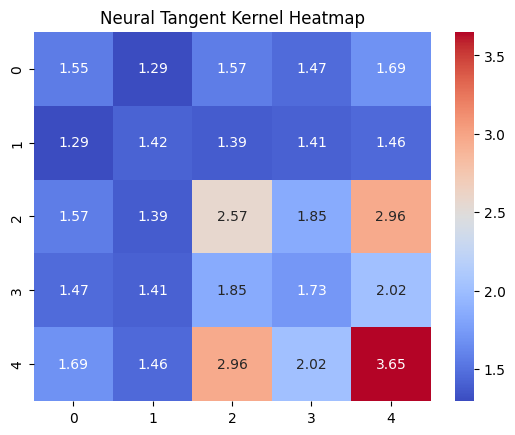

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

class SimpleNN(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=10, output_dim=1):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def compute_ntk(model, inputs):
    """
    Compute the NTK for the given inputs.
    """
    outputs = model(inputs)
    ntk_matrix = []

    for i in range(len(inputs)):
        grads_i = torch.autograd.grad(outputs[i], model.parameters(), retain_graph=True, create_graph=True)
        grads_i = torch.cat([g.view(-1) for g in grads_i])
        row = []
        for j in range(len(inputs)):
            grads_j = torch.autograd.grad(outputs[j], model.parameters(), retain_graph=True, create_graph=True)
            grads_j = torch.cat([g.view(-1) for g in grads_j])
            row.append(torch.dot(grads_i, grads_j).item())
        ntk_matrix.append(row)

    return torch.tensor(ntk_matrix)

input_dim = 2
hidden_dim = 10
output_dim = 1

model = SimpleNN(input_dim, hidden_dim, output_dim)
inputs = torch.randn(5, input_dim, requires_grad=True)

ntk_matrix = compute_ntk(model, inputs)

print("Neural Tangent Kernel (NTK) Matrix:")
print(ntk_matrix)

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(ntk_matrix.detach().numpy(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Neural Tangent Kernel Heatmap")
plt.show()
